In [156]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import pandas as pd
from scipy import optimize, stats

In [157]:
def fit_exp(x, a, b, c):
    return a * np.exp(-x/b) + c

In [158]:
file_name = 'wt_decay_0mvIV.xlsx'
sheet_number = 0 
df = pd.read_excel(file_name, sheet_number)

In [159]:
df_in_np = df.to_numpy()
x_vals = [row[0] for row in df_in_np]
y_vals = [row[1] for row in df_in_np]

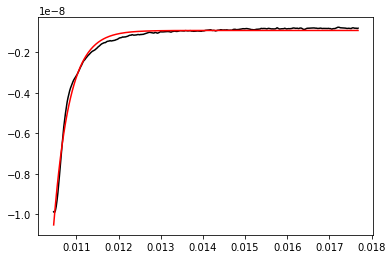

In [160]:
plt.figure()
popt, pcov = optimize.curve_fit(fit_exp, x_vals, y_vals)
y_to_plot = [fit_exp(x, *popt) for x in x_vals]
plt.plot(x_vals, y_vals, color="black")
plt.plot(x_vals, y_to_plot, color="red")

In [93]:
"""
The following code calculates mean and std of tau across 
    different recordings
"""

'\nThe following code calculates mean and std of tau across \n    different recordings\n'

In [94]:
def calc_tau(xs, ys):
    vmax = max(ys) - min(ys)  # get diff of max and min voltage
    vt = min(ys) + .37 * vmax  # get vmax*1/e
    tau = (np.log([(vt - popt[2]) / popt[0]]) / (-popt[1]))[0]  # find time at which curve = vt
    return tau


In [107]:
def get_tau_at_sheet_wt(i):
    file_name = 'wt_decay_0mvIV.xlsx'
    df = pd.read_excel(file_name, i)
    df_in_np = df.to_numpy()
    x_vals = [row[0] for row in df_in_np]
    y_vals = [row[1] for row in df_in_np]
    return calc_tau(x_vals, y_vals)

In [140]:
def get_tau_at_sheet_mut(i):
    #print('AT ' + str(i))
    file_name = 'mut_decay_0mvIV.xlsx'
    df = pd.read_excel(file_name, i)
    df_in_np = df.to_numpy()
    x_vals = [row[0] for row in df_in_np]
    y_vals = [row[1] for row in df_in_np]
    return calc_tau(x_vals, y_vals)

In [123]:
xl = pd.ExcelFile('wt_decay_0mvIV.xlsx')
wt_len = len(xl.sheet_names)
xl = pd.ExcelFile('mut_decay_0mvIV.xlsx')
mut_len = len(xl.sheet_names)

In [151]:
wt_taus = [get_tau_at_sheet_wt(i) for i in range(wt_len)]
mut_taus = [get_tau_at_sheet_mut(i) for i in range(mut_len) if i != 0 and i != 1]


AT 2
AT 3
AT 4
AT 5
AT 6
AT 7
AT 8
AT 9
AT 10
AT 11
AT 12
AT 13
AT 14


In [152]:
std_mut = np.std(mut_taus)
std_wt = np.std(wt_taus)

mean_mut = np.mean(mut_taus)
mean_wt = np.mean(wt_taus)

In [153]:
print("WT mean and STD are: " + str(mean_wt) + ", " + str(std_wt))
print("MUT mean and STD are: " + str(mean_mut) + ", " + str(std_mut))

WT mean and STD are: 76424.00444294435, 2307.0346190335995
MUT mean and STD are: 77942.7082620089, 3960.3672463405724
